## Information Extraction Pipeline

![image](https://miro.medium.com/max/700/1*pHl8XXk0GMo_40rRLRVDqA.png)

#### Coreference resolution

In [1]:
# import Libraries
from nltk.corpus import reuters
import pandas as pd

In [2]:
# Print the categories of reuters dataset
reuters.categories()
# Check for the documents in jobs category.
reuters.fileids(categories=['jobs'])
x = reuters.paras(fileids=['training/9751'])
# printing original list 
print("The original list : " + str(x))

The original list : [[['KEATING', 'REVISES', 'DOWN', 'AUSTRALIAN', 'GROWTH', 'FORECAST', 'Treasurer', 'Paul', 'Keating', 'forecast', 'economic', 'growth', 'at', 'slightly', 'under', 'two', 'pct', 'in', 'the', 'financial', 'year', 'ending', 'June', 'this', 'year', ',', 'down', 'from', 'the', '2', '.', '25', 'pct', 'forecast', 'contained', 'in', 'the', '1986', '/', '87', 'budget', 'delivered', 'last', 'August', '.'], ['Australia', "'", 's', 'terms', 'of', 'trade', 'also', 'fell', ',', 'by', '18', 'pct', ',', 'over', 'the', 'past', 'two', 'years', ',', 'he', 'told', 'Parliament', '.'], ['Terms', 'of', 'trade', 'are', 'the', 'difference', 'between', 'import', 'and', 'export', 'price', 'indexes', '.'], ['Despite', 'the', 'figures', ',', 'the', 'budget', 'forecast', 'of', 'about', '1', '.', '75', 'pct', 'annual', 'growth', 'in', 'employment', 'would', 'be', 'met', ',', 'Keating', 'said', '.'], ['Unemployment', 'is', 'currently', 'at', '8', '.', '2', 'pct', 'of', 'the', 'workforce', '.'], ['"

In [3]:
def get_list_values(text, temp=[]):
    for item in text:
        if type(item) == list:
            temp = get_list_values(item, temp)

        else:
            temp.append(item)

    return temp

 
text = ' '.join(get_list_values(x))
text

'KEATING REVISES DOWN AUSTRALIAN GROWTH FORECAST Treasurer Paul Keating forecast economic growth at slightly under two pct in the financial year ending June this year , down from the 2 . 25 pct forecast contained in the 1986 / 87 budget delivered last August . Australia \' s terms of trade also fell , by 18 pct , over the past two years , he told Parliament . Terms of trade are the difference between import and export price indexes . Despite the figures , the budget forecast of about 1 . 75 pct annual growth in employment would be met , Keating said . Unemployment is currently at 8 . 2 pct of the workforce . " This government is dragging Australia through a trading holocaust the kind of which we have not seen since the Second World War ," Keating said . " We are not pushing this place into a recession . We are not only holding our gains on unemployment , we are bringing unemployment down ," he said , adding that the government had help the country avoid recession .'

In [4]:

text = text.replace(" . ", ".")
text = text.replace(" , ", ",")
text = text.replace("pct","%")
text

'KEATING REVISES DOWN AUSTRALIAN GROWTH FORECAST Treasurer Paul Keating forecast economic growth at slightly under two % in the financial year ending June this year,down from the 2.25 % forecast contained in the 1986 / 87 budget delivered last August.Australia \' s terms of trade also fell,by 18 %,over the past two years,he told Parliament.Terms of trade are the difference between import and export price indexes.Despite the figures,the budget forecast of about 1.75 % annual growth in employment would be met,Keating said.Unemployment is currently at 8.2 % of the workforce." This government is dragging Australia through a trading holocaust the kind of which we have not seen since the Second World War ," Keating said." We are not pushing this place into a recession.We are not only holding our gains on unemployment,we are bringing unemployment down ," he said,adding that the government had help the country avoid recession .'

## Text Preprocessing using NEURALCOREF

In [5]:
import spacy
import neuralcoref

# Load SpaCy
nlp = spacy.load('en')
# Add neural coref to SpaCy's pipe
neuralcoref.add_to_pipe(nlp)
def coref_resolution(text):
    """Function that executes coreference resolution on a given text"""
    doc = nlp(text)
    # fetches tokens with whitespaces from spacy document
    
    
    tok_list = list(token.text_with_ws for token in doc) # fetches tokens with whitespaces from spacy document
    for cluster in doc._.coref_clusters:
        cluster_main_words = set(cluster.main.text.split(' ')) # get tokens from representative cluster name
        for coref in cluster:
            if coref!=cluster.main: #if coreference element is not the representative element of that cluster
                if coref.text!=cluster.main.text and bool(set(coref.text.split(' ')).intersection(cluster_main_words))==False: 
                # if coreference element text and representative element text are not equal and none of the coreference element words are in representative element. This was done to handle nested coreference scenarios
                    tok_list[coref.start] = cluster.main.text + doc[coref.end-1].whitespace_
                    for i in range(coref.start+1, coref.end):
                        tok_list[i] = ""     
    return "".join(tok_list)

In [6]:
result = coref_resolution(text)
result

'KEATING REVISES DOWN AUSTRALIAN GROWTH FORECAST Treasurer Paul Keating forecast economic growth at slightly under two % in the financial year ending June this year,down from the 2.25 % forecast contained in the 1986 / 87 budget delivered last August.Australia \' s terms of trade also fell,by 18 %,over the past two years,Paul Keating told Parliament.Terms of trade are the difference between import and export price indexes.Despite the figures,the budget forecast of about 1.75 % annual growth in employment would be met,Keating said.Unemployment is currently at 8.2 % of the workforce." This government is dragging Australia through a trading holocaust the kind of which we have not seen since the Second World War ," Keating said." we are not pushing this place into a recession.we are not only holding we gains on unemployment,we are bringing unemployment down ," Paul Keating said,adding that the government had help Australia avoid recession .'

In [16]:
import spacy
import neuralcoref

nlp = spacy.load('en_core_web_sm')  # load the model
neuralcoref.add_to_pipe(nlp)

doc = nlp(text)  # get the spaCy Doc (composed of Tokens)

print(doc._.coref_clusters)
print("")
# Result: [Eva and Martha: [Eva and Martha, their, they], Jenny: [Jenny, her]]

x = doc._.coref_resolved
print(x)
# Result: "Eva and Martha didn't want Eva and Martha friend Jenny to feel lonely so Eva and Martha invited Jenny to the party."

[Paul Keating: [Paul Keating, he, Keating, " Keating, Keating, he], Australia: [Australia, Australia, the country], This government: [This government, the government], we: [we, We, We, our, we]]

KEATING REVISES DOWN AUSTRALIAN GROWTH FORECAST Treasurer Paul Keating forecast economic growth at slightly under two % in the financial year ending June this year,down from the 2.25 % forecast contained in the 1986 / 87 budget delivered last August.Australia ' s terms of trade also fell,by 18 %,over the past two years,Paul Keating told Parliament.Terms of trade are the difference between import and export price indexes.Despite the figures,the budget forecast of about 1.75 % annual growth in employment would be met,Paul Keating said.Unemployment is currently at 8.2 % of the workforce." This government is dragging Australia through a trading holocaust the kind of which we have not seen since the Second World War ,Paul Keating Paul Keating said." we are not pushing this place into a recession.we

#### Using `neuralcoref` library by huggingface

In [17]:
import spacy
from spacy import displacy
import en_core_web_sm

# Create an instance of the small pipeline and model from SpaCy
nlp = en_core_web_sm.load()
doc = nlp(result)
displacy.render(doc, jupyter=True, style='ent') 

In [18]:
# Without neuralcoref visualization.
doc = nlp(text)
displacy.render(doc, jupyter=True, style='ent') 

In [19]:
import pandas as pd
doc = nlp(x)

entities = []
labels = []

for ent in doc.ents:
    entities.append(ent)
    labels.append(ent.label_)
    
df = pd.DataFrame({'Entities':entities,'Labels':labels})
df

,Entities,Labels
0,"(Paul, Keating)",PERSON
1,"(two, %)",PERCENT
2,"(the, financial, year, ending, June, this, year)",DATE
3,"(2.25, %)",PERCENT
4,"(1986, /, 87)",DATE
5,"(last, August)",DATE
6,(Australia),GPE
7,"(18, %)",PERCENT
8,"(the, past, two, years)",DATE
9,"(Paul, Keating)",PERSON


#### Splitting the text document into sentences

In [132]:
from spacy.lang.en import English

nlp = English()  # just the language with no model
sentencizer = nlp.create_pipe("sentencizer")
nlp.add_pipe(sentencizer)
sent = [sent.text for sent in nlp(ss).sents]
sent

['Half of all people living in Belgium has now received a coronavirus booster dose, as new cases continue to rapidly increase as a result of the Omicron variant.',
 'As of Sunday, some 5.87 million people have received a booster dose of a coronavirus vaccine, representing 63% of over -18s and 51% of the entire population, according to the figures published by the Sciensano Public Health Institute on Tuesday morning.']

In [136]:
stop_words = stopwords.words('english')
ss = "From the end of February, Belgium will start offering the Novavax coronavirus vaccine – called Nuvaxovid – to people who are allergic to the other available vaccines or had proven side effects after a first dose of Pfizer or Moderna.On Wednesday, the Interministerial Conference (IMC) on Public Health decided to purchase 510,000 doses of vaccine – approved by the European Medicines Agency (EMA) in December – which will be delivered at the end of February or beginning of March. As for Moderna and Pfizer, the Novavax vaccine requires two doses that are administered at an interval of at least three weeks.\“Currently, the vaccine has not yet been approved by the EMA as a booster shot. That is not on the agenda for right now, but it can happen soon,\” Gudrun Briat, spokesperson for the Vaccination Taskforce, told The Brussels Times."
def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
#article= remove_stopwords(ss)

In [137]:
import pandas as pd

df1= pd.DataFrame(columns=["sentence"])

df1 = df1.append(
        [{'sentence' : sent.text} for sent in nlp(ss).sents],
        ignore_index=True
    )
df1

,sentence
0,"From the end of February, Belgium will start o..."
1,"On Wednesday, the Interministerial Conference ..."
2,"As for Moderna and Pfizer, the Novavax vaccine..."
3,"That is not on the agenda for right now, but i..."


In [138]:
df1.to_csv("brusselsdata.csv")


In [24]:
import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet

from IPython.display import display
lemmatizer = nltk.WordNetLemmatizer()

#word tokenizeing and part-of-speech tagger
document = result
tokens = [nltk.word_tokenize(sent) for sent in [document]]
postag = [nltk.pos_tag(sent) for sent in tokens][0]

# Rule for NP chunk and VB Chunk
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        {<RB.?>*<VB.?>*<JJ>*<VB.?>+<VB>?} # Verbs and Verb Phrases
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
        
"""
#Chunking
cp = nltk.RegexpParser(grammar)

# the result is a tree
tree = cp.parse(postag)

def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label() =='NNP'):
        yield subtree.leaves()
        
def get_word_postag(word):
    if pos_tag([word])[0][1].startswith('J'):
        return wordnet.ADJ
    if pos_tag([word])[0][1].startswith('V'):
        return wordnet.VERB
    if pos_tag([word])[0][1].startswith('N'):
        return wordnet.NOUN
    else:
        return wordnet.NOUN
    
def normalise(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    postag = get_word_postag(word)
    word = lemmatizer.lemmatize(word,postag)
    return word

def get_terms(tree):    
    for leaf in leaves(tree):
        terms = [normalise(w) for w,t in leaf]
        yield terms

terms = get_terms(tree)

features = []
for term in terms:
    _term = ''
    for word in term:
        _term += ' ' + word
    features.append(_term.strip())
features

[]

In [35]:
# for loop to separate the document into sentences
for i in range(0,7):
    x = df1.iloc[i][0]
    doc = nlp(x)
    print(x)
    print("")

KEATING REVISES DOWN AUSTRALIAN GROWTH FORECAST Treasurer Paul Keating forecast economic growth at slightly under two % in the financial year ending June this year,down from the 2.25 % forecast contained in the 1986 / 87 budget delivered last August.

Australia ' s terms of trade also fell,by 18 %,over the past two years,Paul Keating told Parliament.

Terms of trade are the difference between import and export price indexes.

Despite the figures,the budget forecast of about 1.75 % annual growth in employment would be met,Keating said.

Unemployment is currently at 8.2 % of the workforce."

This government is dragging Australia through a trading holocaust the kind of which we have not seen since the Second World War ," Keating said."

we are not pushing this place into a recession.we are not only holding we gains on unemployment,we are bringing unemployment down ," Paul Keating said,adding that the government had help Australia avoid recession .



In [28]:
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)
subs_synonyms = ['subsidiary', 'unit']
pattern1 = [{'_': {'ref_t': 'ORG'}}, # subject
           {'_': {'ref_t': {'NOT_IN': ['ORG']}},
            'POS': {'NOT_IN': ['VERB']}, 'OP': '*'},
           {'LOWER': {'IN': subs_synonyms}}, {'TEXT': 'of'},
           {'_': {'ref_t': {'NOT_IN': ['ORG']}},
            'POS': {'NOT_IN': ['VERB']}, 'OP': '*'},
           {'_': {'ref_t': 'ORG'}}]  # object
pattern2 = [{'_': {'ref_t': 'ORG'}}, # subject
           {'LOWER': {'IN': subs_synonyms}}, # predicate
           {'_': {'ref_t': 'ORG'}}] # object
matcher.add('subsidiary-of',[pattern1, pattern2])
def extract_rel_match(doc, matcher):
    for sent in doc.sents:
        for match_id, start, end in matcher(sent):
            span = sent[start:end]  # matched span
            pred = nlp.vocab.strings[match_id] # rule name
            subj, obj = span[0], span[-1]
            if pred.startswith('rev-'): # reversed relation
                subj, obj = obj, subj
                pred = pred[4:]
            yield ((subj._.ref_n, subj._.ref_t), pred, 
                   (obj._.ref_n, obj._.ref_t))
def extract_rels(doc):
    yield from extract_rel_match(doc, matcher)
    yield from extract_rel_dep(doc, 'acquires', acq_synonyms, ['to', 'from'])
    yield from extract_rel_dep(doc, 'sells', ['sell'], ['to', 'from'])

In [36]:
"""doc = nlp(result)

rels = []
for r in extract_rels(doc):   
    rels.append(r)
    print(r)"""

'doc = nlp(result)\n\nrels = []\nfor r in extract_rels(doc):   \n    rels.append(r)\n    print(r)'

In [37]:
"""import nltk
sentence = sent[1]
print(sentence)

print(nltk.ne_chunk(sentence, binary=True))"""

'import nltk\nsentence = sent[1]\nprint(sentence)\n\nprint(nltk.ne_chunk(sentence, binary=True))'

China is in Asia


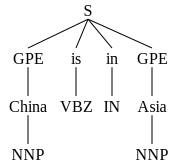

In [38]:
import nltk
sent = "China is in Asia"
print(sent)
s = nltk.ne_chunk((nltk.pos_tag(sent.split()))) 
s

In [39]:
from nltk.tokenize import word_tokenize
text = word_tokenize("Paul works for Microsoft")
x = nltk.pos_tag(text)
x1 = nltk.ne_chunk(x,binary=True)

In [40]:
import re

X = re.compile(r'.*\bin\b(?!\b.+ing)')

for doc in nltk.corpus.ieer.parsed_docs('NYT_19980315'):
    #print(doc)
    for rel in nltk.sem.extract_rels('ORG', 'LOC', doc,corpus='ieer', pattern = X):

        print(nltk.sem.rtuple(rel))
#nltk.corpus.ieer.parsed_docs('NYT_19980315'):

[ORG: 'WHYY'] 'in' [LOC: 'Philadelphia']
[ORG: 'McGlashan &AMP; Sarrail'] 'firm in' [LOC: 'San Mateo']
[ORG: 'Freedom Forum'] 'in' [LOC: 'Arlington']
[ORG: 'Brookings Institution'] ', the research group in' [LOC: 'Washington']
[ORG: 'Idealab'] ', a self-described business incubator based in' [LOC: 'Los Angeles']
[ORG: 'Open Text'] ', based in' [LOC: 'Waterloo']
[ORG: 'WGBH'] 'in' [LOC: 'Boston']
[ORG: 'Bastille Opera'] 'in' [LOC: 'Paris']
[ORG: 'Omnicom'] 'in' [LOC: 'New York']
[ORG: 'DDB Needham'] 'in' [LOC: 'New York']
[ORG: 'Kaplan Thaler Group'] 'in' [LOC: 'New York']
[ORG: 'BBDO South'] 'in' [LOC: 'Atlanta']
[ORG: 'Georgia-Pacific'] 'in' [LOC: 'Atlanta']


In [41]:
import re
X = re.compile(r'.*\bin\b(?!\b.+ing)')
for doc in nltk.corpus.reuters.fileids('jobs'):
    print(doc)
    text = reuters.paras(doc)
    for rel in nltk.sem.extract_rels('ORG','LOC',x,pattern=X):
        print("1")
        print(nltk.sem.rtuple(rel))

test/14867
test/14974
test/15045
test/15365
test/15485
test/16100
test/16158
test/17633
test/18533
test/18539
test/18616
test/18672
test/18987
test/18990
test/18993
test/18996
test/19000
test/19985
test/19986
test/20248
test/21525
training/10135
training/1040
training/11159
training/11160
training/11276
training/12507
training/12534
training/12555
training/12743
training/12752
training/12818
training/14771
training/2000
training/2197
training/2618
training/2746
training/3024
training/3472
training/3520
training/3717
training/4036
training/4091
training/4306
training/4698
training/4700
training/5215
training/5392
training/6158
training/6603
training/6951
training/7004
training/7010
training/7013
training/7070
training/8173
training/867
training/8681
training/8746
training/889
training/895
training/955
training/9751
training/9805
training/9812
training/9834
training/9897


In [42]:
import re
import nltk
from nltk.sem import relextract
from nltk.sem.relextract import extract_rels, rtuple
IN = re.compile(r'.*\bin\b(?!\b.+ing\b)')
for fileid in reuters.fileids():
    for doc in reuters.fileids(categories=['jobs']):
        text1 = reuters.paras(fileids=['training/9751'])
        for rel in relextract.extract_rels('ORG', 'LOC', x1, corpus='conll2002', pattern = IN):
            print(relextract.rtuple(rel))

In [43]:
IN = re.compile(r'.*\bin\b(?!\b.+ing\b)')
text1 = "China is in Asia"
for rel in nltk.sem.extract_rels('PER', 'ORG',text1 , corpus='conll2002', pattern = IN):
    print("1")
    print(relextract.rtuple(rel))
    print(nltk.sem.rtuple(rel))

In [44]:
tagged_sentences = [ nltk.pos_tag(token) for token in tokens]
class doc():
    pass
IN = re.compile(r'.*\bin\b(?!\b.+ing)')
doc.headline=["test headline for sentence"]
for i,sent in enumerate(tagged_sentences):
    doc.text = nltk.ne_chunk(sent)
    for rel in nltk.sem.relextract.extract_rels('ORG', 'LOC', doc, corpus='ieer', pattern=IN):
        print(nltk.sem.rtuple(rel))

In [52]:
import nltk
import re 
from nltk.chunk import ne_chunk_sents
from nltk.sem import relextract
sent = "Half of all people living in Belgium has now received a coronavirus booster dose, as new cases continue to rapidly increase as a result of the Omicron variant. As of Sunday, some 5.87 million people have received a booster dose of a coronavirus vaccine, representing 63% of over -18s and 51% of the entire population, according to the figures published by the Sciensano Public Health Institute on Tuesday morning."
sent = nltk.ne_chunk((nltk.pos_tag(text.split()))) 
for s in sent:
    
    print(s)
    print("")

AttributeError: 'StreamBackedCorpusView' object has no attribute 'split'

In [51]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/arfa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
stop_words = stopwords.words('english')
sent = "Half of all people living in Belgium has now received a coronavirus booster dose, as new cases continue to rapidly increase as a result of the Omicron variant. As of Sunday, some 5.87 million people have received a booster dose of a coronavirus vaccine, representing 63% of over -18s and 51% of the entire population, according to the figures published by the Sciensano Public Health Institute on Tuesday morning."

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
article= remove_stopwords(result)

In [75]:
import nltk
#sent = "Half of all people living in Belgium has now received a coronavirus booster dose, as new cases continue to rapidly increase as a result of the Omicron variant. As of Sunday, some 5.87 million people have received a booster dose of a coronavirus vaccine, representing 63% of over -18s and 51% of the entire population, according to the figures published by the Sciensano Public Health Institute on Tuesday morning."
entity_df =[]


for sent in nltk.sent_tokenize(article):
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
        if hasattr(chunk, 'label'):
            print([chunk.label(), ' '.join(c[0] for c in chunk)])
            entity_df.append([chunk.label(), ' '.join(c[0] for c in chunk)])
        if hasattr(chunk, 'VB'):
            print(chunk)   
entity_df

['ORGANIZATION', 'REVISES']
['PERSON', 'Paul Keating']
['PERSON', 'Paul Keating']
['GPE', 'Keating']
['GPE', 'Australia']
['ORGANIZATION', 'Second']
['PERSON', 'Keating']
['PERSON', 'Paul Keating']
['GPE', 'Australia']


[['ORGANIZATION', 'REVISES'],
 ['PERSON', 'Paul Keating'],
 ['PERSON', 'Paul Keating'],
 ['GPE', 'Keating'],
 ['GPE', 'Australia'],
 ['ORGANIZATION', 'Second'],
 ['PERSON', 'Keating'],
 ['PERSON', 'Paul Keating'],
 ['GPE', 'Australia']]

In [76]:
new_sent = nltk.ne_chunk((nltk.pos_tag(article.split()))) 
#print(new_sent)
data1 = []
for s in new_sent:
    data1.append(s)
data1

[('KEATING', 'NN'),
 Tree('ORGANIZATION', [('REVISES', 'NNP')]),
 ('DOWN', 'NNP'),
 ('AUSTRALIAN', 'NNP'),
 ('GROWTH', 'NNP'),
 ('FORECAST', 'NNP'),
 ('Treasurer', 'NNP'),
 Tree('PERSON', [('Paul', 'NNP'), ('Keating', 'NNP')]),
 ('forecast', 'JJ'),
 ('economic', 'JJ'),
 ('growth', 'NN'),
 ('slightly', 'RB'),
 ('two', 'CD'),
 ('%', 'NN'),
 ('financial', 'JJ'),
 ('year', 'NN'),
 ('ending', 'VBG'),
 ('June', 'NNP'),
 ('year,down', 'RB'),
 ('2.25', 'CD'),
 ('%', 'NN'),
 ('forecast', 'NN'),
 ('contained', 'JJ'),
 ('1986', 'CD'),
 ('/', 'JJ'),
 ('87', 'CD'),
 ('budget', 'NN'),
 ('delivered', 'VBN'),
 ('last', 'JJ'),
 ('August.Australia', 'NNP'),
 ("'", 'POS'),
 ('terms', 'NNS'),
 ('trade', 'NN'),
 ('also', 'RB'),
 ('fell,by', 'VBD'),
 ('18', 'CD'),
 ('%,over', 'RB'),
 ('past', 'JJ'),
 ('two', 'CD'),
 ('years,Paul', 'NN'),
 Tree('PERSON', [('Keating', 'NNP')]),
 ('told', 'VBD'),
 ('Parliament.Terms', 'NNP'),
 ('trade', 'NN'),
 ('difference', 'NN'),
 ('import', 'NN'),
 ('export', 'NN'),
 ('pri

In [77]:
import pandas as pd
df = pd.DataFrame(data1)
#df=df.drop(['col1','col2'],axis=1)

In [78]:
verbs_df = df.loc[df[1].isin(['VB','VBG','VBP','VBD','VBN'])]
verbs_df

,0,1
16,ending,VBG
27,delivered,VBN
34,"fell,by",VBD
41,told,VBD
58,"met,Keating",VB
66,dragging,VBG
71,seen,VBN
79,pushing,VBG
82,holding,VBG
85,bringing,VBG


In [79]:
noun_df = df.loc[df[1].isin(['NN', 'NNP','NNS'])]
noun_df

,0,1
0,KEATING,NN
2,DOWN,NNP
3,AUSTRALIAN,NNP
4,GROWTH,NNP
5,FORECAST,NNP
6,Treasurer,NNP
10,growth,NN
13,%,NN
15,year,NN
17,June,NNP


In [80]:
df = pd.DataFrame.from_records(entity_df)
df

,0,1
0,ORGANIZATION,REVISES
1,PERSON,Paul Keating
2,PERSON,Paul Keating
3,GPE,Keating
4,GPE,Australia
5,ORGANIZATION,Second
6,PERSON,Keating
7,PERSON,Paul Keating
8,GPE,Australia


In [83]:
import nltk
import re

IN = re.compile (r'.*\bin\b(?!\b.+ing)')

class doc():
    pass

doc.headline=['foo']
doc.text=[nltk.Tree('ORGANIZATION', ['WHYY']), 'in', nltk.Tree('LOCATION',['Philadelphia']), '.', 'Ms.', nltk.Tree('PERSON', ['Gross']), ',']

for rel in  nltk.sem.extract_rels('ORG','LOC',doc,corpus='ieer',pattern=IN):
    print(nltk.sem.relextract.show_raw_rtuple(rel))

AttributeError: module 'nltk.sem.relextract' has no attribute 'show_raw_rtuple'

In [100]:
df1.to_csv("Data.csv")

In [101]:
df = pd.read_csv("Data.csv")
df

,Unnamed: 0,sentence
0,0,KEATING REVISES DOWN AUSTRALIAN GROWTH FORECAS...
1,1,"Australia ' s terms of trade also fell,by 18 %..."
2,2,Terms of trade are the difference between impo...
3,3,"Despite the figures,the budget forecast of abo..."
4,4,Unemployment is currently at 8.2 % of the work...
5,5,This government is dragging Australia through ...
6,6,we are not pushing this place into a recession...


In [103]:
df[df['sentence'].str.contains('keating' and 'Australia')]

,Unnamed: 0,sentence
1,1,"Australia ' s terms of trade also fell,by 18 %..."
5,5,This government is dragging Australia through ...
6,6,we are not pushing this place into a recession...


In [107]:
def get_entity(sent):
    ent1 = "" #subject entity
    ent2 = "" #object entity

    prev_token_text = "" #text from previous token
    prev_token_dep = ""  #depedency from previous token

    prefix = ""
    modifier = ""

    for tok in nlp(sent):
    #Go in only if it is not a punctuation, else next word
        if tok.dep_ != "punct":
        #Check if token is a compund word
            if tok.dep_ == "compound":
                prefix = tok.text
        #Check if previous token is also a compound
                if prev_token_dep == "compound":
                    prefix = prev_token_text + " "+ prefix
      #Check if token is a modifier or not
            if tok.dep_.endswith("mod")==True:
                modifier = tok.text 
        #Check if previous token is a compound
                if prev_token_dep == "compound":
                    modifier = prev_token_text + " " + modifier

      #Checking if subject
            if tok.dep_.find("subj") == True:
                ent1 =modifier+ " " + prefix + " " + tok.text
                prefix = ""
                modifer = ""
      #Checking if object
            if tok.dep_.find("obj") == True:
                ent2 =modifier+ " " + prefix + " " + tok.text
                prefix = ""
                modifer = ""

      #Update variables
            prev_token_text = tok.text
            prev_token_dep = tok.dep_

      ############################
    return [ent1.strip(), ent2.strip()]

In [117]:
[ent1,ent2] = get_entity("the film had 200 patents")
print("Subj : {a}, obj : {b}".format(a = ent1, b = ent2))
get_entity("the film had 200 patents")

Subj : , obj : 


['', '']

In [115]:
from tqdm import tqdm
entity_pairs = []
for i in tqdm(df['sentence']):
    entity_pairs.append(get_entity(i))
tqdm._instances.clear()

100%|████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 1128.50it/s]


In [121]:
subjects = []
objects = []
subjects = [x[0] for x in entity_pairs]
objects = [x[1] for x in entity_pairs]

In [128]:
import re
import pandas as pd
import spacy
from tqdm import tqdm
# Load English tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load("en_core_web_sm")
from spacy.matcher import Matcher
import networkx as nx
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import string 
tqdm._instances.clear()

In [119]:
def get_entity1(sent):
  ent1 = "" #subject entity
  ent2 = "" #object entity

  prev_token_text = "" #text from previous token
  prev_token_dep = ""  #depedency from previous token

  prefix = ""
  modifier = ""

  for tok in nlp(sent):
    #Go in only if it is not a punctuation, else next word
    if tok.dep_ != "punct":
      #Check if token is a compund word
      if tok.dep_ == "compound":
        prefix = tok.text
        #Check if previous token is also a compound
        if prev_token_dep == "compound":
          prefix = prev_token_text + " "+ prefix
      #Check if token is a modifier or not
      if tok.dep_.endswith("mod")==True:
        modifier = tok.text 
        #Check if previous token is a compound
        if prev_token_dep == "compound":
          modifier = prev_token_text + " " + modifier

      #Checking if subject
      if tok.dep_.find("subj") == True:
        ent1 =modifier+ " " + prefix + " " + tok.text
        prefix = ""
        modifer = ""
      #Checking if object
      if tok.dep_.find("obj") == True:
        ent2 =modifier+ " " + prefix + " " + tok.text
        prefix = ""
        modifer = ""

      #Update variables
      prev_token_text = tok.text
      prev_token_dep = tok.dep_

      ############################
  return [ent1.strip(), ent2.strip()]    

In [120]:
[ent1,ent2] = get_entity1("the film had 200 patents")
print("Subj : {a}, obj : {b}".format(a = ent1, b = ent2))
get_entity("the film had 200 patents")

Subj : , obj : 


['', '']

In [126]:
def get_relation(sent):
  doc = nlp(sent)
  #We initialise matcher with the vocab
  matcher = Matcher(nlp.vocab)
  #Defining the pattern
  pattern = [{'DEP':'ROOT'},{'DEP':'prep','OP':'?'},{'DEP':'agent','OP':'?'},{'DEP':'ADJ','OP':'?'}]
  #Adding the pattern to the matcher
  matcher.add("matcher_1",None,pattern)
  #Applying the matcher to the doc
  matches = matcher(doc)

  #The matcher returns a list of (match_id, start, end). The start to end in our doc contains the relation. We capture that relation in a variable called span
  span = doc[matches[0][1]:matches[0][2]]
  return span.text

In [127]:
print(get_entity("John completed the task"))
print(get_relation("John completed the task"))

['', '']


IndexError: list index out of range